In [1]:
import sys
import os
sys.path.append('../src')
from fsm import gspan_to_igraph
import numpy as np
import igraph as ig
import networkx as nx

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
with open('../data/fsm/subgraphs/graph.gspan.fp', 'r') as f:
    gspan = f.read()

In [3]:
graphs = gspan_to_igraph(gspan)

In [4]:
motif_matrix = np.zeros((len(graphs), 30))
lines = gspan.split('\n')
i = 0
for line in lines:
    if line.startswith('x'):
        for x in line.split(' ')[1:]:
            if x:
                motif_matrix[i, int(x)] = 1
        i += 1

In [5]:
pca = PCA(n_components=2)
# pca = TSNE(n_components=2, perplexity=15, random_state=69)
x = pca.fit_transform(motif_matrix.T)

In [6]:
data_path = '../data/hashtags/edges/'
edge_files = [file for file in os.listdir(data_path) if file.endswith('.txt')]

In [7]:
def categorize_hashtags(names):
    """Categorizes hashtags into predefined categories."""
    categories = {
        'Shared interest/subculture': [
            'anime', 'booktok', 'football', 'gym', 'jazz',
            'kpop', 'lgbt', 'makeup', 'minecraft', 'plantsoftiktok'
        ],
        'Political discussion': [
            'biden2024', 'blacklivesmatter', 'climatechange', 'conspiracy',
            'election', 'gaza', 'israel', 'maga', 'palestine', 'trump2024'
        ],
        'Entertainment/knowledge': [
            'asmr', 'challenge', 'comedy', 'learnontiktok', 'movie',
            'news', 'science', 'storytime', 'tiktoknews', 'watermelon'
        ],
        'Random Graphs': [f'G_random_{i}' for i in range(8)]
    }

    name_to_category = {name: category for category, tags in categories.items() for name in tags}
    return [name_to_category.get(name, 'Unknown') for name in names]

Text(0, 0.5, 'PC2')

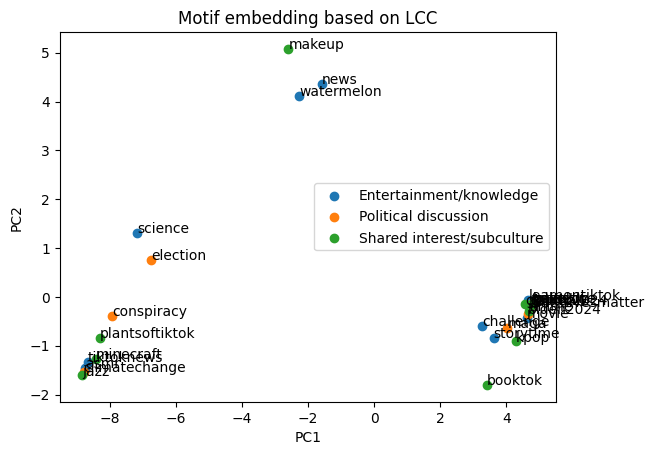

In [8]:
fig, ax = plt.subplots()

labels = np.array([categorize_hashtags([file.split('_')[0]])[0] for file in edge_files])
for label in np.unique(labels):
    idx = np.where(labels == label)
    ax.scatter(x[idx, 0], x[idx, 1], label=label)

for i, txt in enumerate(edge_files):
    ax.annotate(txt.split('_')[0], (x[i, 0], x[i, 1]))

ax.legend()
ax.set_title('Motif embedding based on LCC')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')